# 가시화 최종 모델 ver


- Intermediate feature space 가시화
    - -> 중간 특성 공간 가시화
    * feature map ( 레이어의 필터에 의해 추출된 시각적 패턴 ) 
    - 1 ) conv layer ouput 


- CAM (class activation map) 가시화
    - 1 ) grad_cam 을 이용함
        - 각 convolution layer 들 마다의 비교
        - 정답레이블을 맞춘 경우와 못맞춘 경우의 grad_cam 비교
        
        
- 결과와 학습 과정의 가시화 (3D surface visualization) 
    - 1 ) T_SNE 분포 확인
        - T-SNE는 일반적으로 고차원 데이터를 저차원으로 축소하여 시각화하는데 사용됨. 따라서 T-SNE를 적용하기 위해서는 고차원의 특징을 필요로 한다. 일반적으로는 분류 작업에서 마지막 레이어 이전의 레이어에서 특징을 추출하는 것이 일반적임
        
    - 방식 3) 텐서보드 활용 -> history [보고서 삽입]
    
# 가시화 최종 모델 + custom_loss function ver
    - 1 ) Grad_cam
    - 2 ) T_SNE


## 최종모델 loading

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('../save/final.h5')

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"테스트 데이터셋 정확도: {accuracy * 100:.2f}%")
 


313/313 [==============================] - 69s 208ms/step - loss: 0.4473 - accuracy: 0.9225
테스트 데이터셋 정확도: 92.25%


### conv layer output

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

def visualize_conv_layer_output(model, image_array, layer_index, rows, columns):
    # 특정 conv 레이어 지정
    conv_layer_output = model.layers[layer_index].output
    model_short = tf.keras.models.Model(inputs=model.inputs, outputs=conv_layer_output)

    # 배열을 모델이 예상하는 크기로 reshape
    input_data = tf.image.resize(image_array, (32, 32))

    # 입력 데이터 정규화
    input_data = input_data / 255.0

    # 배치 차원 추가
    input_data = tf.expand_dims(input_data, axis=0)

    # 모델 예측
    feature_output = model_short.predict(input_data)

    fig=plt.figure(figsize=(5, 5))
    for i in range(1, rows*columns + 1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_xticks([])  # x축 눈금 제거
        ax.set_yticks([])  # y축 눈금 제거
        ax.imshow(feature_output[0, :, :, i-1], cmap='gray')
    plt.show()



In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

def visualize_conv_layer_output(model, image_array, layer_index, rows, columns):
    # 특정 conv 레이어 지정
    conv_layer_output = model.layers[layer_index].output
    model_short = tf.keras.models.Model(inputs=model.inputs, outputs=conv_layer_output)

    # 배열을 모델이 예상하는 크기로 reshape
    input_data = tf.image.resize(image_array, (32, 32))

    # 입력 데이터 정규화
    input_data = input_data / 255.0

    # 배치 차원 추가
    input_data = tf.expand_dims(input_data, axis=0)

    # 모델 예측
    feature_output = model_short.predict(input_data)

    fig=plt.figure(figsize=(5, 5))
    for i in range(1, rows*columns + 1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_xticks([])  # x축 눈금 제거
        ax.set_yticks([])  # y축 눈금 제거
        ax.imshow(feature_output[0, :, :, i-1], cmap='gray')
    
    plt.show()


Block 1:
Visualizing Layer 1-1
1/1 [==============================] - 0s 146ms/step


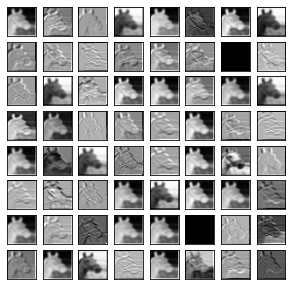

Visualizing Layer 1-2
1/1 [==============================] - 0s 123ms/step


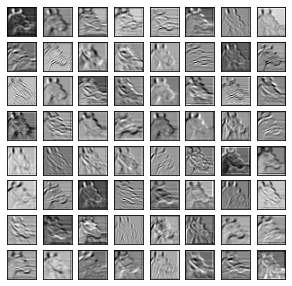

Block 2:
Visualizing Layer 2-1
1/1 [==============================] - 0s 186ms/step


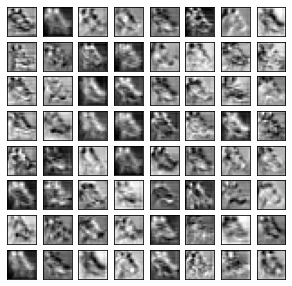

Visualizing Layer 2-2
1/1 [==============================] - 0s 204ms/step


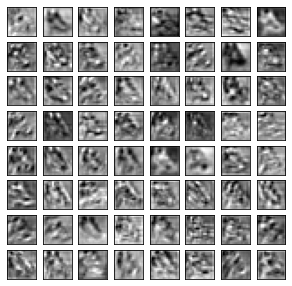

Block 3:
Visualizing Layer 3-1
1/1 [==============================] - 0s 252ms/step


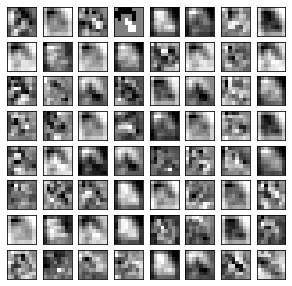

Visualizing Layer 3-2
1/1 [==============================] - 1s 805ms/step


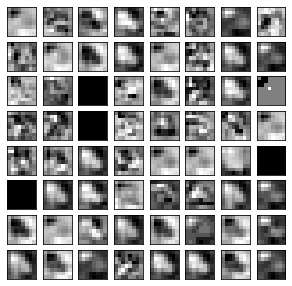

Visualizing Layer 3-3
1/1 [==============================] - 1s 502ms/step


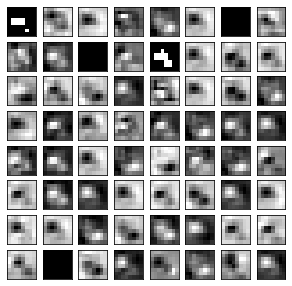

Visualizing Layer 3-4
1/1 [==============================] - 0s 440ms/step


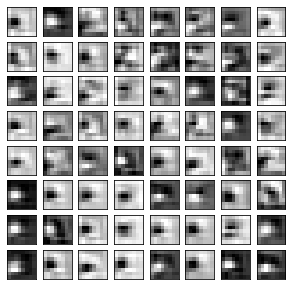

Block 4:
Visualizing Layer 4-1
1/1 [==============================] - 1s 508ms/step


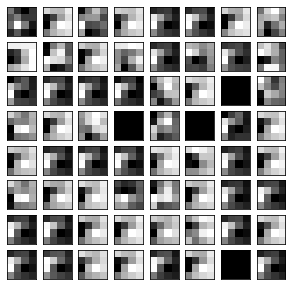

Visualizing Layer 4-2
1/1 [==============================] - 1s 517ms/step


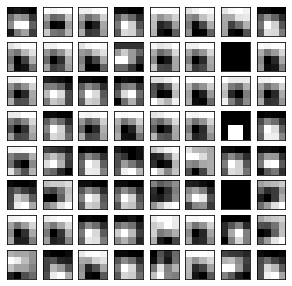

Visualizing Layer 4-3
1/1 [==============================] - 0s 481ms/step


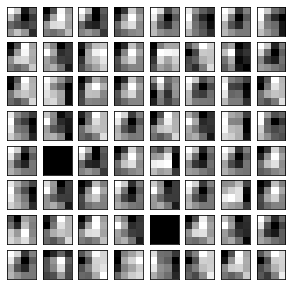

Visualizing Layer 4-4
1/1 [==============================] - 1s 688ms/step


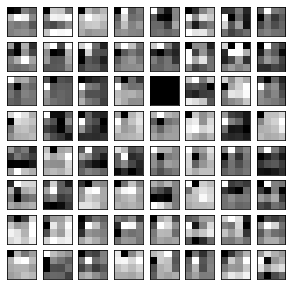

Block 5:
Visualizing Layer 5-1
1/1 [==============================] - 1s 563ms/step


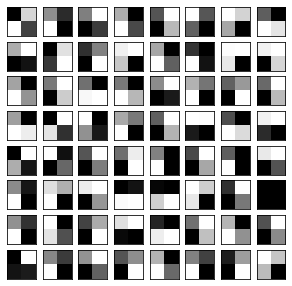

Visualizing Layer 5-2
1/1 [==============================] - 1s 595ms/step


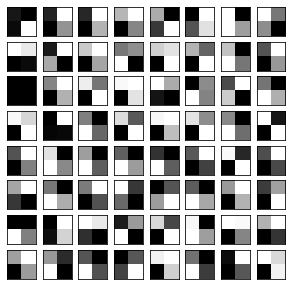

Visualizing Layer 5-3
1/1 [==============================] - 1s 642ms/step


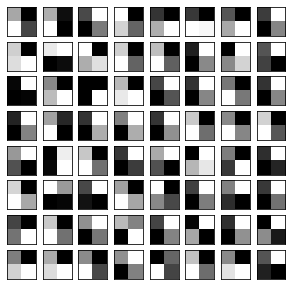

Visualizing Layer 5-4
1/1 [==============================] - 1s 845ms/step


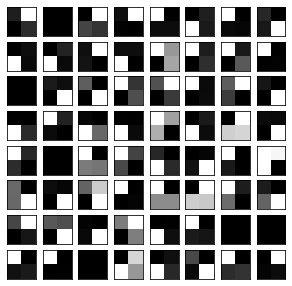

In [46]:
from tensorflow.keras.preprocessing.image import img_to_array

image_index = 99
image_array = img_to_array(x_test[image_index])

block_indices = [[0,3],[7, 10],[ 14, 17, 20, 23], [27, 30, 33, 36] , [40, 43,46, 49]]  # 각 블록의 레이어 인덱스
rows, columns = 8, 8  # 시각화할 그리드 크기를 설정합니다.

for i, block in enumerate(block_indices):
    print(f"Block {i + 1}:")
    for j, layer_index in enumerate(block):
        block_layer_index = f"{i+1}-{j+1}"
        print(f"Visualizing Layer {block_layer_index}")
        visualize_conv_layer_output(model, image_array, layer_index, rows, columns)



### Grad_cam 가시화
- 1) 레이어별 분석
- 2) 정답레이블을 맞춘 경우와 못맞춘 경우의 grad_cam 비교

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


# Grad-CAM 생성 함수
def get_grad_cam(model, layer_name, image, class_index):
    # 모델의 특정 레이어 가져오기
    layer = model.get_layer(layer_name)
    # 특정 레이어의 출력과 그래디언트 계산하기 위해 모델의 새로운 모델 생성
    grad_model = tf.keras.models.Model(inputs=model.inputs, outputs=[layer.output, model.output])

    # 특정 레이어의 출력과 예측 확률 계산
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        class_index = int(class_index)
        loss = predictions[:, class_index]

    # 그래디언트 계산
    grads = tape.gradient(loss, conv_output)[0]
    # 클래스에 대한 특성 맵 가중치 계산
    weights = tf.reduce_mean(grads, axis=(0, 1))
    # 가중치와 특성 맵을 곱하여 활성화 맵 생성
    cam = np.dot(conv_output[0], weights.numpy())
    cam = cv2.resize(cam, (image.shape[2], image.shape[1]))
    cam = np.maximum(cam, 0)
    
    cam_max = np.max(cam)
    if cam_max != 0:
        cam /= cam_max

    return cam

def visualize_grad_cam_by_index(model, layer_indices, image, class_index):
    num_layers = len(layer_indices)
    num_rows = 4
    num_cols = 4

    fig = plt.figure(figsize=(2*num_cols, 2*num_rows))

    for i, layer_index in enumerate(layer_indices):
        layer = model.layers[layer_index]
        layer_name = layer.name
        cam = get_grad_cam(model, layer_name, image, class_index)

        ax = fig.add_subplot(num_rows, num_cols, i+1)
        ax.imshow(image[0])
        ax.imshow(cam, cmap='jet', alpha=0.5)
        ax.axis('off')
        ax.set_title('Grad-CAM ({})'.format(layer_name))
        ax.set_aspect('equal')  # 공간을 띄워주기 위해 가로세로 비율을 동일하게 설정

    plt.tight_layout()
    plt.show()


In [31]:
import cv2
import numpy as np

from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(_, _), (x_test, y_test) = cifar10.load_data()


#  0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36, 40, 43, 46, 49 <- 현재 컨벌루션 레이어 


# 이미지 선택 
image_index = 7 # 테스트셋에서 사용할 이미지의 인덱스

# 이미지 전처리
image = x_test[image_index]
image = cv2.resize(image, (32, 32))  # 모델의 입력 크기로 조정
image = image.astype(np.float32) / 255.0  # 이미지 정규화
image = np.expand_dims(image, axis=0)  # 배치 형태로 변환

# 클래스 인덱스 설정
class_index = y_test[image_index][0]  # 이미지에 해당하는 클래스 인덱스

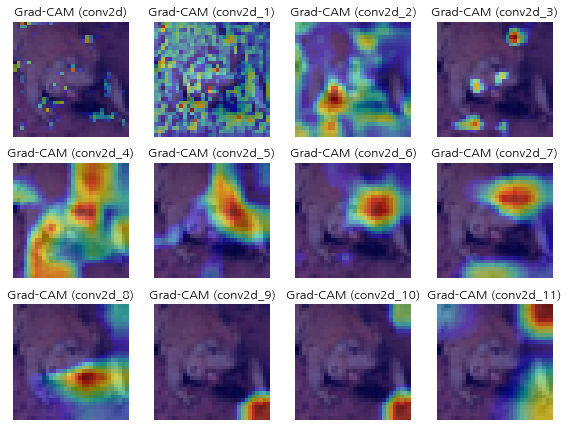

In [62]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

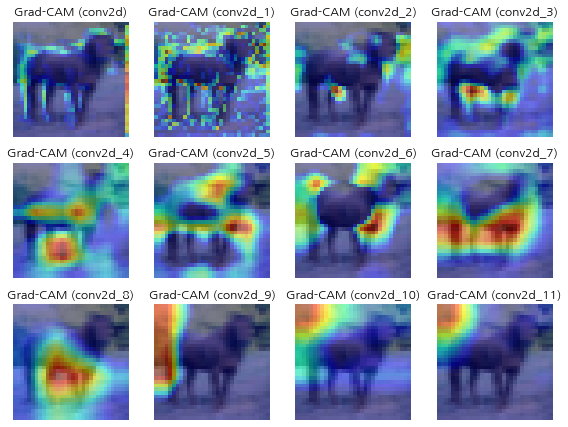

In [10]:
image_index = 230 # 테스트셋에서 사용할 이미지의 인덱스
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

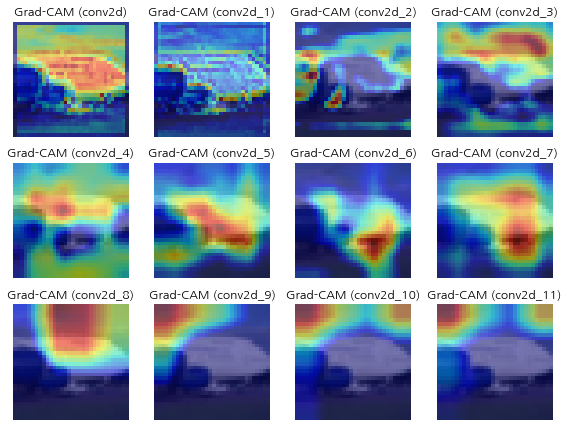

In [15]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

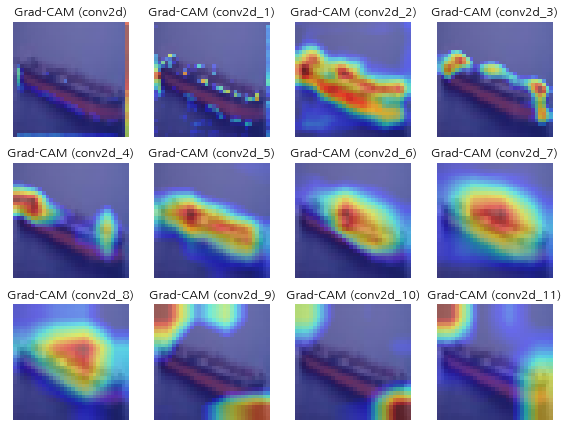

In [18]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

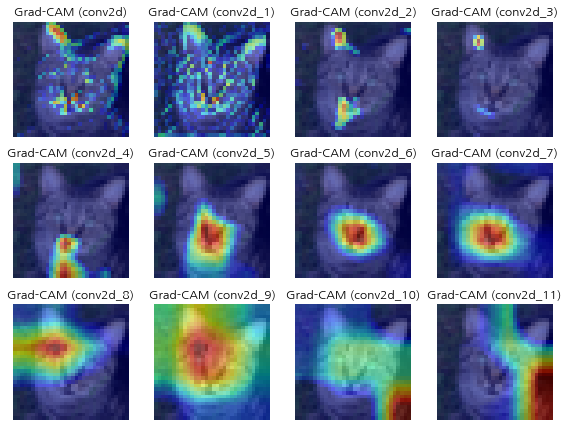

In [21]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

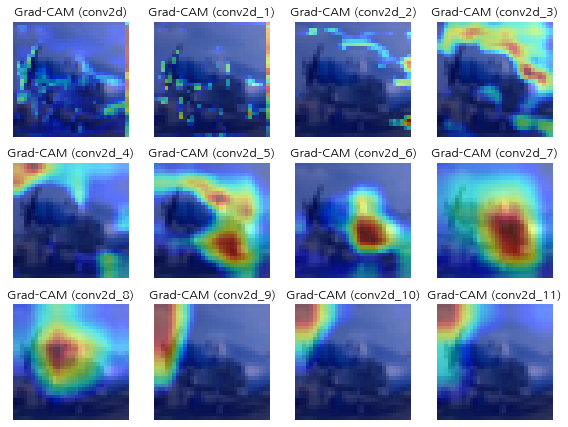

In [26]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

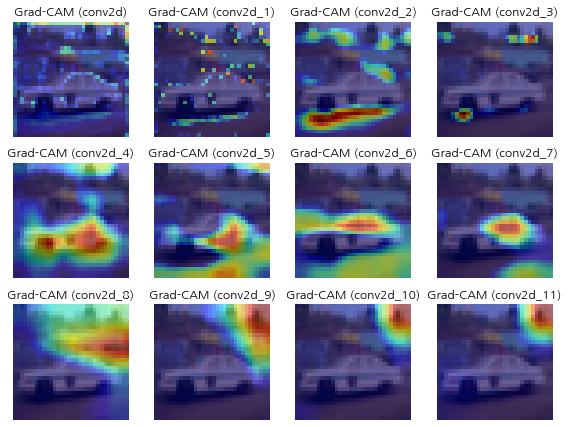

In [29]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

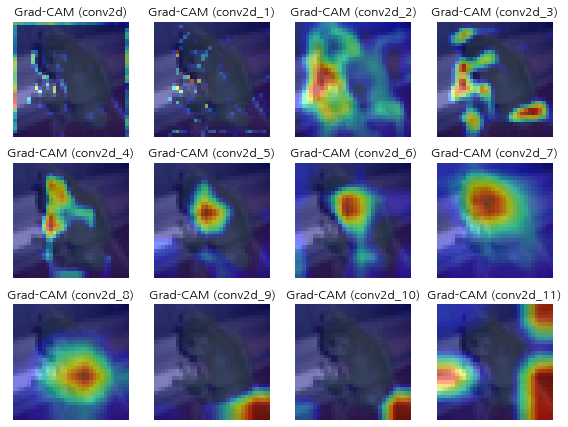

In [32]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model, layer_indices, image, class_index)

#### 정답을 맞추지 못한 경우의 test_data index

In [14]:
classname = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [11]:
actual = np.argmax(y_test, axis=1)
p=[]
accuracy=[]
# TruePred=[]
incorrect_pred = []
correct_pred = []
incorrect_class = []
p2 = []
actuals = []

X_test = x_test[:100]
for idx, val in enumerate(X_test):
    val = np.expand_dims(val, axis=0)
    pred = model.predict(val)
    predicted_value = np.argmax(pred, axis=1)
    p.append(predicted_value)
    accuracy.append(np.amax(pred, axis=1)*100)
    if actual[idx] != predicted_value:
        print("틀림")
        incorrect_pred.append(idx)
        p2.append(int(predicted_value))
        actuals.append(int(actual[idx]))
    else:
        correct_pred.append(idx)

1/1 [==============================] - 0s 42ms/step
틀림
1/1 [==============================] - 0s 46ms/step
틀림
1/1 [==============================] - 0s 59ms/step
틀림
1/1 [==============================] - 0s 66ms/step
틀림
1/1 [==============================] - 0s 50ms/step
틀림
1/1 [==============================] - 0s 47ms/step
틀림
1/1 [==============================] - 0s 48ms/step
틀림
1/1 [==============================] - 0s 60ms/step


In [12]:
incorrect_pred

[37, 52, 58, 59, 61, 68, 86]

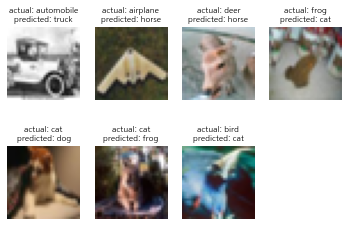

In [15]:
for i in range(1, 8):
    img = X_test[incorrect_pred[i-1]]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title("actual: %s\npredicted: %s" % (classname[actuals[i-1]], classname[p2[i-1]]), fontsize=8)

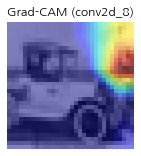

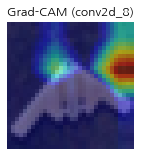

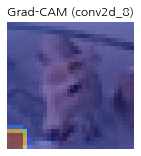

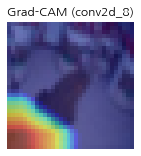

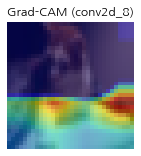

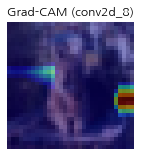

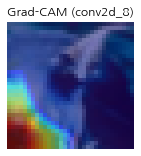

In [36]:
#### incorrect_pred 의 grad_cam -- > 이상한 부분이 활성화 됨을 알 수 있음 

indices = [37, 52, 58, 59, 61, 68, 86]  ## 정답을 맞추지 않은 idx
class_index = 27

for idx in indices:
    image_index = idx # 테스트셋에서 사용할 이미지의 인덱스

    # 이미지 전처리
    image = x_test[image_index]
    image = cv2.resize(image, (32, 32))  # 모델의 입력 크기로 조정
    image = image.astype(np.float32) / 255.0  # 이미지 정규화
    image = np.expand_dims(image, axis=0)  # 배치 형태로 변환
    
    class_index = y_test[image_index][0] 

    visualize_grad_cam_by_index(model, [27], image, class_index)

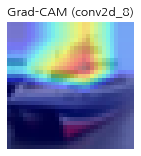

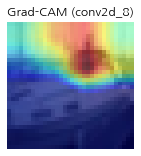

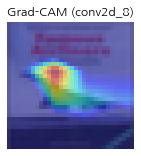

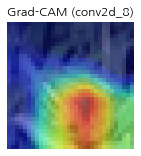

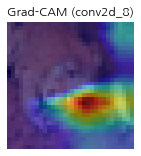

In [38]:
#### 맞춘 그림의 grad_cam -- > 이상한 부분이 활성화 됨을 알 수 있음 

indices = [1,2,3,4,5]  ## 정답을 맞추지 않은 idx
class_index = 27

for idx in indices:
    image_index = idx # 테스트셋에서 사용할 이미지의 인덱스

    # 이미지 전처리
    image = x_test[image_index]
    image = cv2.resize(image, (32, 32))  # 모델의 입력 크기로 조정
    image = image.astype(np.float32) / 255.0  # 이미지 정규화
    image = np.expand_dims(image, axis=0)  # 배치 형태로 변환
    
    class_index = y_test[image_index][0] 

    visualize_grad_cam_by_index(model, [27], image, class_index)

### 특징 추출 기반 T_SNE 

#### visualize_tsne_layer_features 
- 마지막에서 레이어 두개를 기준으로 출력

In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

# CIFAR-10 데이터셋의 레이블 이름
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# CIFAR-10 데이터셋 불러오기
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 데이터를 [0, 1] 범위로 정규화
train_data = (train_data/255.).astype("float32")
test_data = (test_data/255.).astype("float32")

def visualize_tsne_layer_features(model, layer_index, test_data, test_labels):
    # 지정된 레이어까지의 모델 생성
    feature_extractor = Model(inputs=model.input, outputs=model.layers[layer_index].output)

    # 테스트 데이터셋에 대한 중간 특징 추출
    test_features = feature_extractor.predict(test_data)

    # T-SNE를 사용하여 중간 특징의 차원을 축소
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(test_features)

    # 시각화
    fig, ax = plt.subplots(figsize=(10, 8))
    
    scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], c=np.argmax(test_labels, axis=1), cmap='tab10')
    #legend1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper right", title_fontsize=14)
    #ax.add_artist(legend1)
    
    handles, labels = scatter.legend_elements()
    legend2 = ax.legend(handles, cifar10_labels, loc="lower right", title_fontsize=14)

    plt.title(f'T-SNE Visualization of  {layer_index} Layer Features')
    plt.show()



313/313 [==============================] - 17s 50ms/step


/Users/bleeyam/miniforge3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


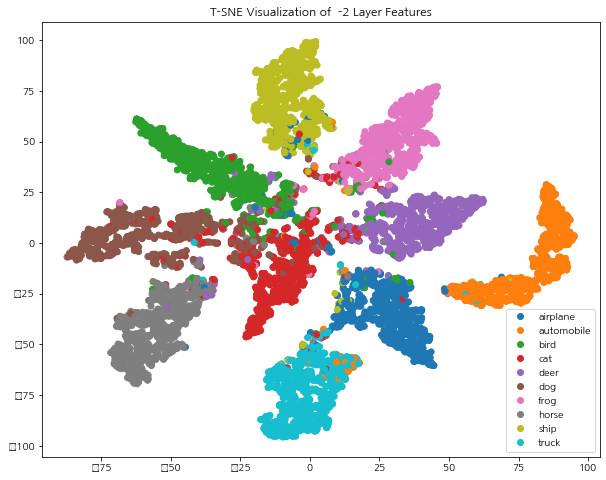

313/313 [==============================] - 15s 46ms/step


/Users/bleeyam/miniforge3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


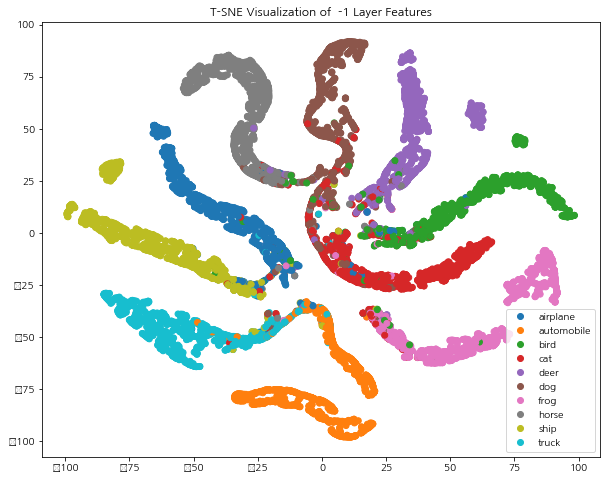

In [10]:
for i in range(-2, 0, 1):
    visualize_tsne_layer_features(model, i, test_data, test_labels)


# 가시화 ( 최종 모델 + custom_loss ver )

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

def label_based_partition(y_true, y_pred):
    # 함수 내용
    labels = tf.argmax(y_true, axis=-1)  # 원핫 인코딩 제거.
    y_pred_partitions = []
    for label in range(10):  
        mask = tf.equal(labels, label)
        partition = tf.boolean_mask(y_pred, mask)
        y_pred_partitions.append(partition)
    return y_pred_partitions


@tf.function
def k_means_clustering(data, k=2, max_iterations=100):

    num_points = tf.shape(data)[0]
    dimensions = tf.shape(data)[1]

    centroids = tf.slice(tf.random.shuffle(data), [0, 0], [k, dimensions]) # 배치 사이즈가 작으면 k개를 못뽑는 불상사가 생김.

    old_centroids = tf.zeros([k, dimensions])

    def should_continue(i, centroids, old_centroids):
        return i<max_iterations

    def iteration(i, centroids, old_centroids):
        expanded_vectors = tf.expand_dims(data, 0)
        expanded_centroids = tf.expand_dims(centroids, 1)

        distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
        assignments = tf.argmin(distances, 0)

        means = []
        for c in range(k):
            means.append(tf.reduce_mean(
                tf.gather(data,
                          tf.reshape(
                              tf.where(tf.equal(assignments, c)),
                              [1, -1])
                          ), axis=[1]))

        new_centroids = tf.concat(means, 0)
        return [i + 1, new_centroids, centroids]

    _, centroids, _ = tf.while_loop(should_continue, iteration, [0, centroids, old_centroids])

    return centroids


@tf.function
def kmeans_cluster_loss(y_true, y_pred):
    y_pred_partitions = label_based_partition(y_true, y_pred)
    sum_similarity = 0
    cent_list = [] #
    for label_tens in y_pred_partitions :
        cents = k_means_clustering(label_tens)
        label_cent=tf.reduce_sum(cents,axis = 0)/2 # 열끼리 싹 더함.
        cent_list.append(label_cent)

        cents=tf.nn.l2_normalize(cents, axis=1) # 코사인 유사도 계산
        similarity = tf.tensordot(cents[0], cents[1],axes=1)
        sum_similarity += tf.reduce_sum(similarity) # 코사인 유사도 전부 더해서 로그 씌울것.
        # tf.print("similarity")
        # tf.print(similarity, sum_similarity)  
        
    cent_concated = tf.stack(cent_list, axis=0) # 2차원 텐서 생성  
    label_distance = tf.norm(
        tf.expand_dims(cent_concated, axis=1)
        - tf.expand_dims(cent_concated, axis=0),
        axis=-1,
    )
    #tf.print("label dis : ")
    #tf.print(label_distance)
    label_distance = tf.reduce_sum(cent_concated)

   
    crossentropy = tf.keras.losses.CategoricalCrossentropy()

    return (
        crossentropy(y_true, y_pred) 
        - 0.1 * tf.keras.backend.log(1+ sum_similarity) # sum_similarity 는 클 수록 좋은것. 최대 10임. 로스는 나쁜거니까 뺴줘야. 0.1 안해줘도 학습 잘 함.
        - 0.1 * tf.keras.backend.log(1 + label_distance) # label_distance 도 클 수록 좋은것. 라벨과의 거리가 멀어졌다는걸 의미.
    )

model_C = tf.keras.models.load_model('../save/6_1.hdf5', custom_objects={'kmeans_cluster_loss': kmeans_cluster_loss})




## Grad_cam 비교

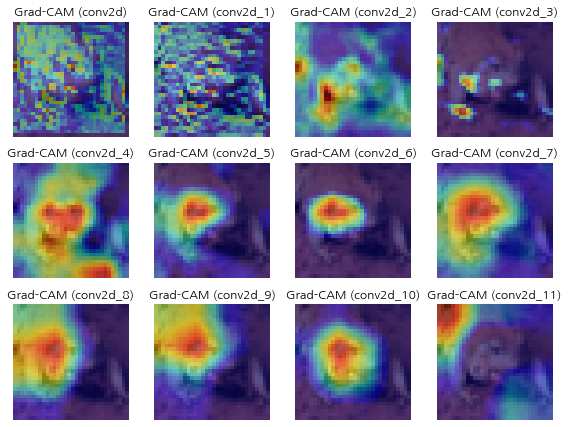

In [59]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

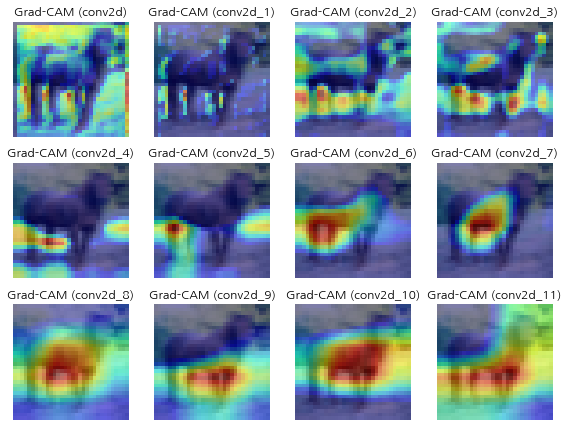

In [13]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

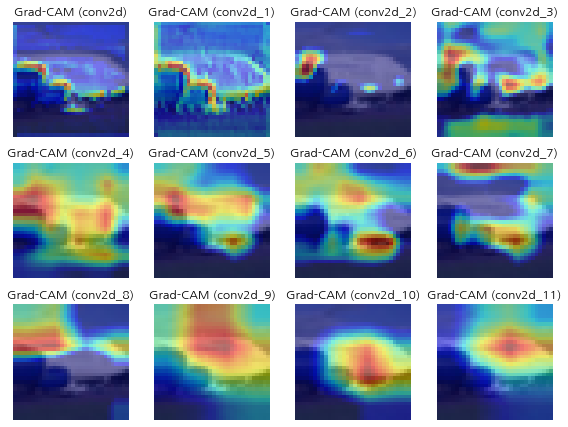

In [16]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

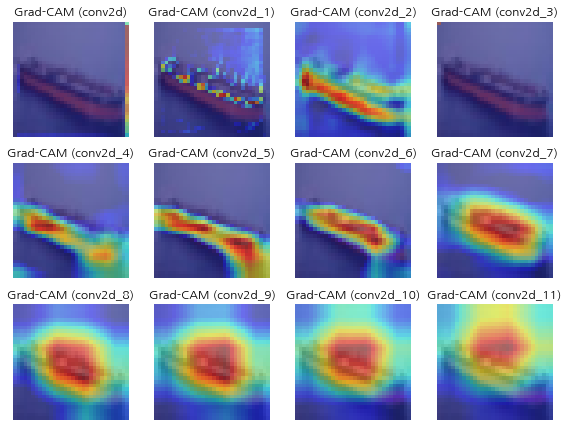

In [19]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

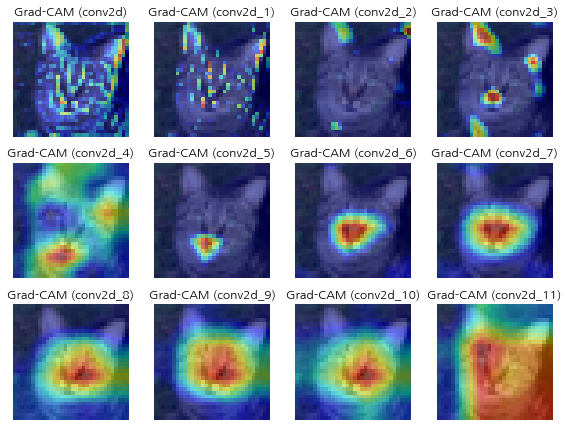

In [24]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36 ]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

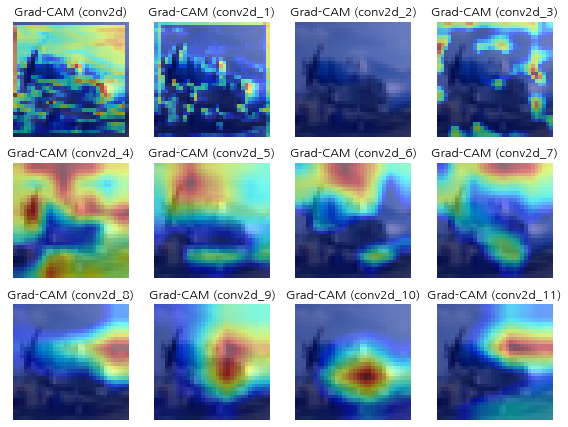

In [27]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36 ]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

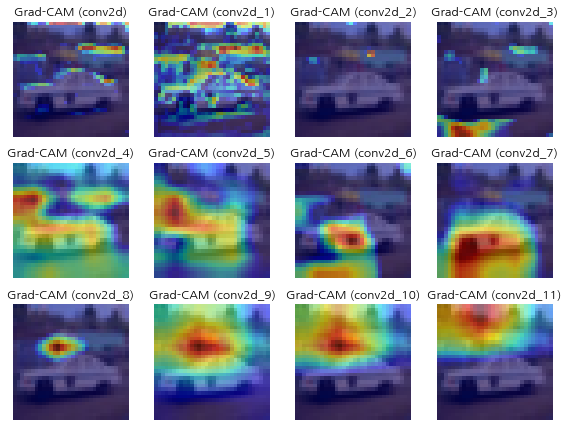

In [30]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36 ]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

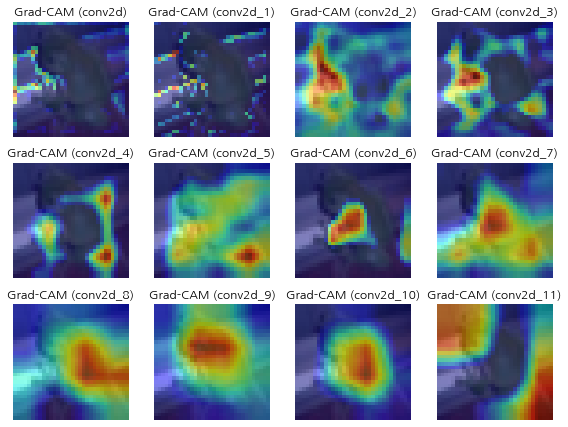

In [33]:
layer_indices = [ 0, 3, 7, 10, 14, 17, 20, 23, 27, 30, 33, 36 ]
visualize_grad_cam_by_index(model_C, layer_indices, image, class_index)

## T_SNE

313/313 [==============================] - 21s 63ms/step


/Users/bleeyam/miniforge3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


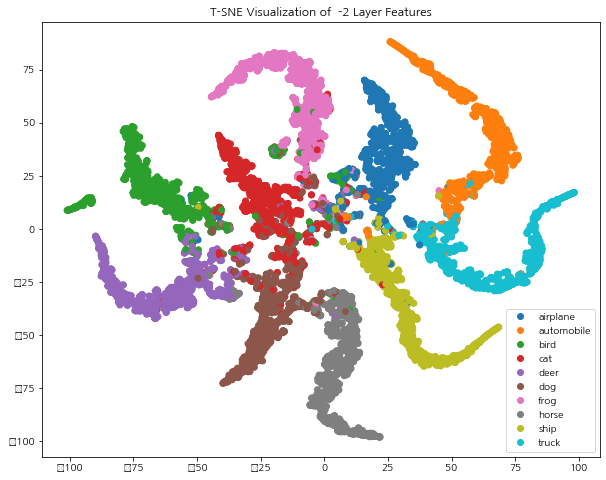

313/313 [==============================] - 19s 55ms/step


/Users/bleeyam/miniforge3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


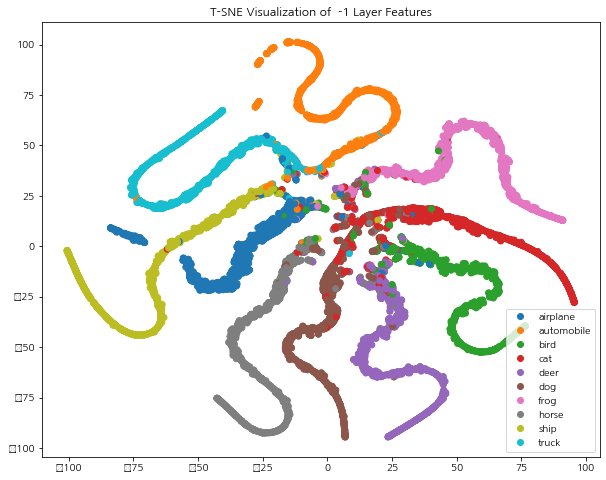

In [58]:
for i in range(-2, 0, 1):
    visualize_tsne_layer_features(model_C, i, test_data, test_labels)